In [47]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from os.path import expanduser
import re
from nltk.stem.porter import PorterStemmer

In [48]:
stop_words = [word.strip() for word in open('stop_words.txt').readlines()]

In [49]:
def stemming_tokenizer(str_input):
    porter_stemmer = PorterStemmer()
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [50]:
with open('dems.txt', 'r',encoding="utf-8") as file:
    dem_text = [line.strip('\n') for line in file]
with open('gop.txt', 'r',encoding="utf-8") as file:
    gop_text = [line.strip('\n') for line in file]
with open('NonPolitical.txt', 'r',encoding="utf-8") as file:
    nonp_text = [line.strip('\n') for line in file]

In [51]:
vectorizer = CountVectorizer(input=dem_text + gop_text+nonp_text,
                             stop_words=stop_words,
                             max_features=12000,tokenizer=stemming_tokenizer)

In [52]:
dem_bow = vectorizer.fit_transform(dem_text)
gop_bow = vectorizer.fit_transform(gop_text)
nonp_bow = vectorizer.fit_transform(nonp_text)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anybodi', 'anyon', 'anyth', 'anywher', 'avail', 'balanc', 'becam', 'becaus', 'becom', 'befor', 'certainli', 'clearli', 'coverag', 'doe', 'dure', 'earli', 'evenli', 'everi', 'everybodi', 'everyon', 'everyth', 'everywher', 'f796a80b0741d338640618cb3dc2547525884e6a', 'freeli', 'fulli', 'gener', 'ha', 'head', 'hi', 'howev', 'import', 'larg', 'mani', 'manual', 'mostli', 'necessari', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'perhap', 'possibl', 'quit', 'realli', 'sever', 'sinc', 'somebodi', 'someon', 'someth', 'somewher', 'therefor', 'thi', 'thu', 'togeth', 'veri', 'wa', 'whi'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [53]:
#%%
(dem_bow.shape, gop_bow.shape, nonp_bow.shape)
#%%

((19373, 12000), (18978, 12000), (12913, 12000))

In [54]:
x = sparse.vstack((dem_bow, gop_bow, nonp_bow))
ones = np.ones(19373)
zeros = np.zeros(18978)
twos = np.full(12913,2)
y = np.hstack((ones, zeros, twos))

In [55]:
class_names = ['Democrats','Republicans','Non-Political']

In [56]:
from sklearn.model_selection import train_test_split 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state = 42) 

In [60]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[4689,    2,    9],
       [   4, 4833,    2],
       [   7,    4, 3266]])

Confusion matrix, without normalization
[[4689    2    9]
 [   4 4833    2]
 [   7    4 3266]]
Normalized confusion matrix
[[9.97659574e-01 4.25531915e-04 1.91489362e-03]
 [8.26617070e-04 9.98760074e-01 4.13308535e-04]
 [2.13610009e-03 1.22062862e-03 9.96643271e-01]]


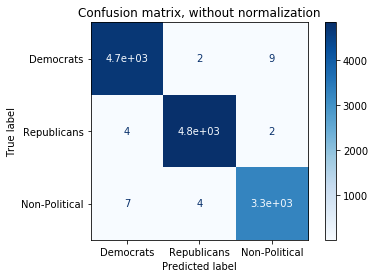

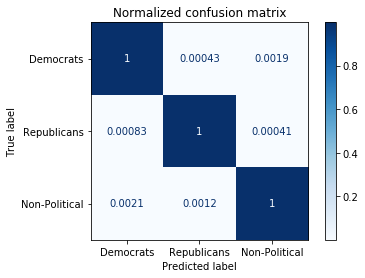

In [62]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,display_labels=class_names, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()